In [44]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tifffile as tf
import math
import matplotlib as mpl
from scipy.stats import wilcoxon
import csv

file_folder_list_ach_1 = ['20230417-nsyb-G7f-rAch1h/fly2',
                        '20230420-nsyb-G7f-rAch1h/fly2',
                        '20230420-nsyb-G7f-rAch1h/fly3',
                        '20230428-nsyb-G7f-rAch1h/fly1',
                        '20230507-nsyb-G7f-rAch1h/fly1',
                        '20230510-nsyb-G7f-rAch1h/fly1',
                        '20230510-nsyb-G7f-rAch1h/fly2',
                        '20230511-nsyb-G7f-rAch1h/fly2',
                        '20230511-nsyb-G7f-rAch1h/fly3',
                        '20230515-nsyb-G7f-rAch1h/fly1']
file_folder_list_ach_2 = ['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', 
                 '20230507-fly1', '20230510-fly1', '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']
file_folder_list_5ht_1 = ['20230429-nsyb-G7f-r5HT1.0/fly1',
                        '20230506-nsyb-G7f-r5HT1.0/fly1',
                        '20230513-nsyb-G7f-r5HT1.0/fly1',
                        '20230513-nsyb-G7f-r5HT1.0/fly2',
                        '20230516-nsyb-G7f-r5HT1.0/fly2',
                        '20230516-nsyb-G7f-r5HT1.0/fly4',
                        '20230517-nsyb-G7f-r5HT1.0/fly1',
                        '20230601-nsyb-G7f-r5HT1.0/fly1',
                        '20230601-nsyb-G7f-r5HT1.0/fly3',
                        '20230603-nsyb-G7f-r5HT1.0/fly1']
file_folder_list_5ht_2 = ['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', '20230513-r5HT1.0-fly2', 
                '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4', '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly1', 
                '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1']

In [45]:
filename = 'list_AUC_weighted_each_region' 
odor_selected = 2
flag_name = 'AUC' 
title_list = ['G7f','rACh','r5-HT']
if_save = True
ymin = 30
ymax = 100
y_chance = 50
thresh = np.arange(0,1,0.02)
expr_thresh = 0.8
br_name = np.array(['MBPED','MBVL','MBML','LH','SLP','SIP','SMP','CRE','EB'])
br_olf = np.array([1,1,1,1,1,1,1,1,0])

In [46]:
## Ach
result_path = '../pipeline-revision/results/nsyb-G7f-rAch1h'
sub_path = 'each_region_L-DEEPCAD-formal'

num_channel_choice = 3
list_fly =  [0,1,2,3,4,5,6,7,8,9]###### choose fly
num_fly = len(list_fly)
if if_save:
    figure_save_path = './results/' + '2_class_mean'
    folder = os.path.exists(figure_save_path)
    if not folder:
        os.makedirs(figure_save_path)

# compute 
list_acc = np.zeros((num_fly,num_channel_choice,len(br_name)))
for i,id in enumerate(list_fly):
    # load map
    the_path = result_path + '/' + file_folder_list_ach_2[id] + '/' + sub_path + '/' + filename + '.npy'
    folder = os.path.exists(the_path)
    if not folder:
        continue
    a = np.load(the_path)
    # print(np.shape(a))
    a = np.mean(a,4)
    a = a[:,odor_selected,:,thresh==expr_thresh,0]
    # print(np.shape(a))
    list_acc[i,:,:] = a

list_acc_ach = list_acc
print(np.shape(list_acc_ach))

(10, 3, 9)


In [47]:
## 5HT
result_path = '../pipeline-revision/results/nsyb-G7f-r5HT1.0'
sub_path = 'each_region_L-DEEPCAD-formal'

list_fly =  [0,1,2,3,4,5,6,7,8,9]###### choose fly
num_fly = len(list_fly)

# compute 
list_acc = np.zeros((num_fly,num_channel_choice,len(br_name)))
for i,id in enumerate(list_fly):
    # load map
    the_path = result_path + '/' + file_folder_list_5ht_2[id] + '/' + sub_path + '/' + filename + '.npy'
    folder = os.path.exists(the_path)
    if not folder:
        continue
    a = np.load(the_path)
    # print(np.shape(a))
    a = np.mean(a,4)
    a = a[:,odor_selected,:,thresh==expr_thresh,0]
    # print(np.shape(a))
    list_acc[i,:,:] = a

list_acc_5ht = list_acc
print(np.shape(list_acc_5ht))

(10, 3, 9)


[2.86102295e-06 9.53674316e-07 9.53674316e-07 5.34439087e-03
 9.53674316e-07 9.53674316e-07 9.53674316e-07 2.86102295e-06
 9.53674316e-07]
[0.00097656 0.00097656 0.00097656 0.05273438 0.01367188 0.00097656
 0.00195312 0.00097656 0.00097656]
[9.76562500e-04 9.76562500e-04 9.76562500e-04 9.99023438e-01
 1.16210938e-01 9.76562500e-04 4.88281250e-03 4.88281250e-03
 4.60937500e-01]


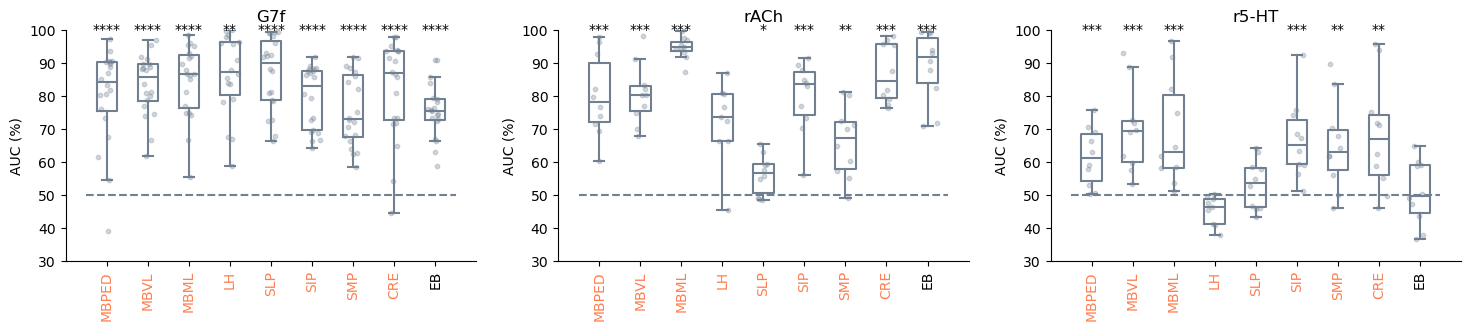

In [48]:
# each olfactory region
fig,ax = plt.subplots(figsize = (18,3),nrows=1,ncols=3)
p_result = []
for ii in range(3):
    if ii==0:
        list_acc_selected = np.concatenate((np.squeeze(list_acc_ach[:,1,:]),np.squeeze(list_acc_5ht[:,1,:])),axis = 0)
    elif ii==1:
        list_acc_selected = np.squeeze(list_acc_ach[:,2,:])
    else:
        list_acc_selected = np.squeeze(list_acc_5ht[:,2,:])
    list_acc_selected = list_acc_selected*100
    list_acc_1 = list_acc_selected

    # plot
    the_mean = np.zeros(len(br_name))
    the_std = np.zeros(len(br_name))
    for j in range(len(br_name)):
        aa = np.squeeze(list_acc_1[:,j])
        # print(aa)
        the_mean[j] = np.mean(aa[aa!=0])
        the_std[j] = np.std(aa[aa!=0],ddof = 1)/math.sqrt(len(aa[aa!=0]))

    ax[ii].spines['top'].set_visible(False)
    ax[ii].spines['right'].set_visible(False)

    # ax[ii].bar(np.squeeze(np.where(br_olf==1)), the_mean[br_olf==1], width=0.7,yerr = the_std[br_olf==1],error_kw = {'ecolor' : '0.2', 'capsize' :3 },
    #                     alpha=0.7,facecolor = 'white',edgecolor='coral',linewidth=1.5,label = 'Olfactory Region')
    # ax[ii].bar(np.squeeze(np.where(br_olf==0)), the_mean[br_olf==0], width=0.7,yerr = the_std[br_olf==0],error_kw = {'ecolor' : '0.2', 'capsize' :3 },
    #                     alpha=0.7,facecolor = 'white',edgecolor='black',linewidth=1.5,label = 'Others')
    
    # for j in range(len(br_name)):
    #     a = np.squeeze(list_acc_1[:,j])
    #     a = a[a!=0]
    #     ax[ii].scatter(j*np.ones(np.size(a)),a,color = 'slategray',s = 6,alpha = 0.2)

    # ## errorbar
    # ax[ii].errorbar(range(len(br_name)),the_mean,yerr=the_std,ecolor='slategray',elinewidth=2,marker='.',mfc='slategray',\
	# mec='slategray',mew=1,ms=1,alpha=1,capsize=5,capthick=3,color='slategray', linewidth=1)   

    #boxplot
    list_acc_selected_nonzero=[]
    for j in range(len(br_name)):
        aa = np.squeeze(list_acc_1[:,j])
        aa = aa[aa!=0]
        aa = aa.tolist()
        list_acc_selected_nonzero.append(aa)
        jittered_x = np.random.normal(j, 0.1, len(aa)) 
        ax[ii].scatter(jittered_x, aa, color='slategray', alpha=0.3,s = 10)
    list_acc_selected_nonzero = np.array(list_acc_selected_nonzero,object)
    ax[ii].boxplot((list_acc_selected_nonzero).tolist(),
            medianprops={'color': 'slategray', 'linewidth': '1.5'},
            # meanline=True,
            # showmeans=True,
            # meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},
            showfliers=False,
            positions= np.squeeze(np.where(br_olf>=0)),
            boxprops = {'color': 'slategray', 'linewidth': '1.5'},
            whiskerprops = {'color': 'slategray', 'linewidth': '1.5'},
            capprops =  {'color': 'slategray', 'linewidth': '1.5'},
            flierprops={"marker": "o", "markerfacecolor": "slategray", "markeredgecolor":"slategray","markersize": 2})



    ax[ii].plot([0-0.5,len(br_name)-0.5],[y_chance,y_chance],color = 'slategray',linestyle='--')
    # for j in range(len(br_name)):
    #     for i in range(num_fly):
    #         if list_acc_1[i,j]!=0:
    #             ax[ii].scatter(j,list_acc_1[i,j],color = 'black',s = 6)
    ax[ii].set_xticks(range(len(br_name)),br_name,rotation=90)
    # ax[ii].legend()
    ax[ii].set_ylabel((flag_name + ' (%)'))
    ax[ii].set_xlim((-1,len(br_name)))
    ax[ii].set_ylim((ymin,ymax))
    ax[ii].set_title(title_list[ii])
    for j in range(len(br_name)):
        if br_olf[j]==1:
            ax[ii].get_xticklabels()[j].set_color('coral') 
    ## significance
    p_list = []
    for i in range(len(br_name)):
        a = np.squeeze(list_acc_1[:,i])-y_chance
        
        res = wilcoxon(a,alternative = 'greater')
        p = res.pvalue
        p_list.append(p)
    p_list = np.array(p_list)
    print(p_list)
    for i in range(len(br_name)):
        p = p_list[i]
        if p<0.05 and p>=0.01:
            ax[ii].text(i,ymax,'*',verticalalignment = 'center', horizontalalignment = 'center')
        elif p<0.01 and p>0.001:
            ax[ii].text(i,ymax,'**',verticalalignment = 'center', horizontalalignment = 'center')
        elif p<0.001 and p>=0.0001:
            ax[ii].text(i,ymax,'***',verticalalignment = 'center', horizontalalignment = 'center') 
        elif p<0.0001:
            ax[ii].text(i,ymax,'****',verticalalignment = 'center', horizontalalignment = 'center') 
    p_result.append(p_list)
if if_save:
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.savefig(figure_save_path + '/' + 'revision_r1_m2_all_p2_' + filename + '_odor'+str(odor_selected)+'-bar-ver.pdf',dpi = 300,bbox_inches = 'tight')
    plt.savefig(figure_save_path + '/' + 'revision_r1_m2_all_p2_' + filename + '_odor'+str(odor_selected)+'-bar-ver.png',dpi = 300,bbox_inches = 'tight')
    with open(figure_save_path + '/' + 'revision_r1_m2_all_p2_' + filename + '_odor'+str(odor_selected)+'-p.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(p_result)
plt.show()